In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [2]:
def multi_boxplot(dataframe, save=None):
    '''
    Visualizar múltiplos boxplots
    '''
    fig, axs = plt.subplots(1, dataframe.shape[1] - 1, figsize=(20, 5))
    
    col_plot  = np.arange(0, dataframe.shape[1] - 1)

    for i,coluna in enumerate(dataframe.drop('fetal_health', axis=1).columns):
        ax = axs[col_plot[i]]
        sns.boxplot(x='fetal_health', y=coluna, data=dataframe, ax=ax)
    
    if save is not None:
        plt.savefig(save + '.eps', bbox_inches="tight")

In [3]:
def multi_histo(dataframe, save=None):
    '''
    Visualizar múltiplos histogramas
    '''
    fig, axs = plt.subplots(1, dataframe.shape[1], figsize=(20, 5), sharey=True)
    
    col_plot  = np.arange(0, dataframe.shape[1])
    cols_df   = dataframe.columns

    for i in range(len(cols_df)):
        sns.histplot(dataframe, x=cols_df[i], ax=axs[col_plot[i]], legend=False, kde=True) 
        axs[col_plot[i]].set_xlabel(cols_df[i], rotation=10)
    
    if save is not None:
        plt.savefig(save + '.eps', bbox_inches="tight")

In [4]:
df = pd.read_csv('fetal_health.csv')

In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.shape

(2126, 22)

In [7]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

Text(0, 0.5, 'Contagem')

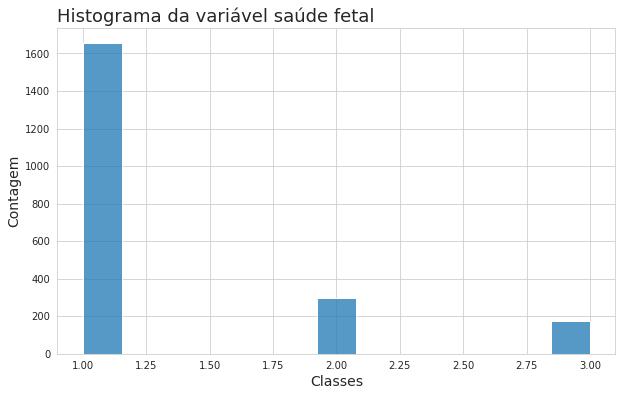

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x='fetal_health', ax=ax) 
ax.set_title('Histograma da variável saúde fetal', loc='left', fontsize=18)
ax.set_xlabel('Classes', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
    
#plt.savefig('hist_resposta' + '.eps', dpi=1000)

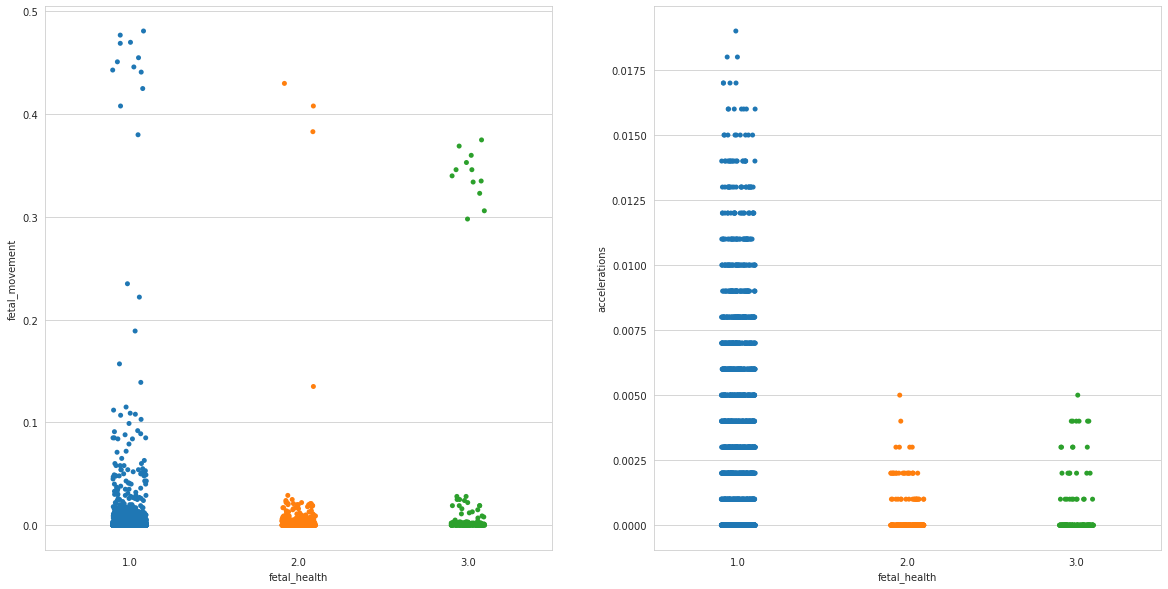

In [9]:
# COMO O MOVIMENTO DO FETO INFLUENCIA a saude do feto 
fig, axs = plt.subplots(1, 2, figsize=(20,10))
        
sns.stripplot(x="fetal_health", y="fetal_movement", data=df, ax=axs[0])

sns.stripplot(x="fetal_health", y="accelerations", data=df, ax=axs[1])

plt.savefig('pontinhos1.eps', dpi=1200, bbox_inches="tight")

In [10]:
#https://blog.medicalway.com.br/cardiotocografia-entenda-a-importancia-para-a-saude-do-bebe/
#frequência cardíaca fetal varie junto com movimentos e contrações uterinas.
#fig = plt.figure(figsize=(20,10))
#sns.boxplot(x='uterine_contractions', y='baseline value', hue='fetal_health', data=df)
#plt.savefig('contravsbaseline.png', dpi=1200)
#plt.scatter(df['uterine_contractions'], df['baseline value'])

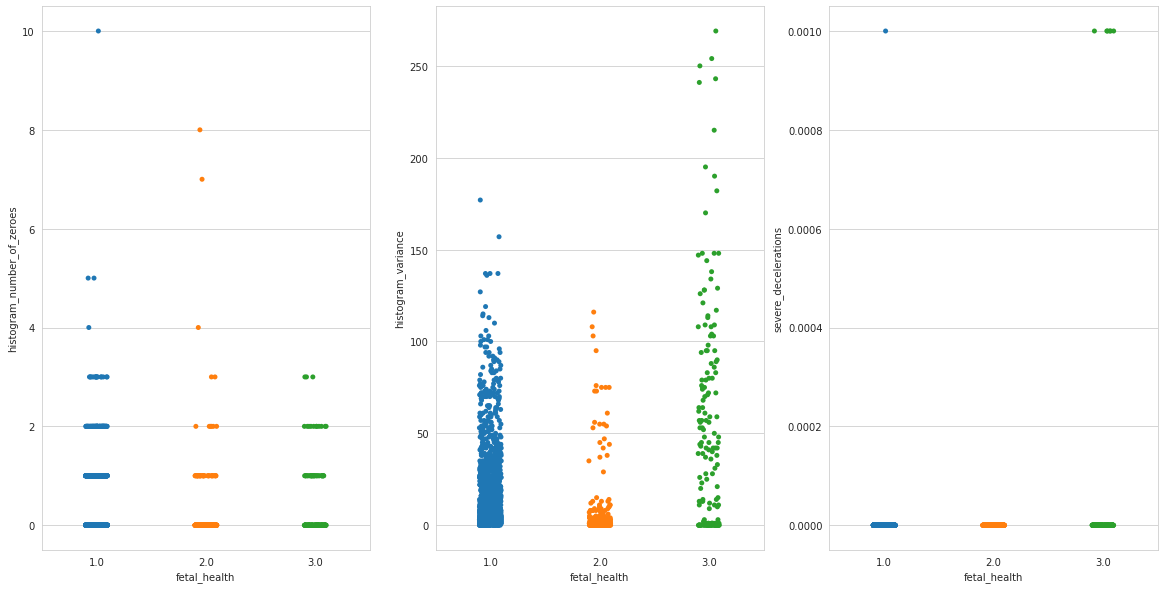

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20,10))
        
sns.stripplot(x="fetal_health", y=df['histogram_number_of_zeroes'], data=df, ax=axs[0])

sns.stripplot(x="fetal_health", y=df['histogram_variance'], data=df, ax=axs[1])

sns.stripplot(x="fetal_health", y=df['severe_decelerations'], data=df, ax=axs[2])

plt.savefig('pontinhos2.eps', dpi=1200, bbox_inches="tight")

In [12]:
cols = ['histogram_mode', 'histogram_mean', 'histogram_median', 'severe_decelerations', \
        'histogram_number_of_zeroes', 'histogram_variance', 'accelerations', 'fetal_movement']
df_aux1 = df.drop(cols, axis=1)
df_aux1.shape

(2126, 14)

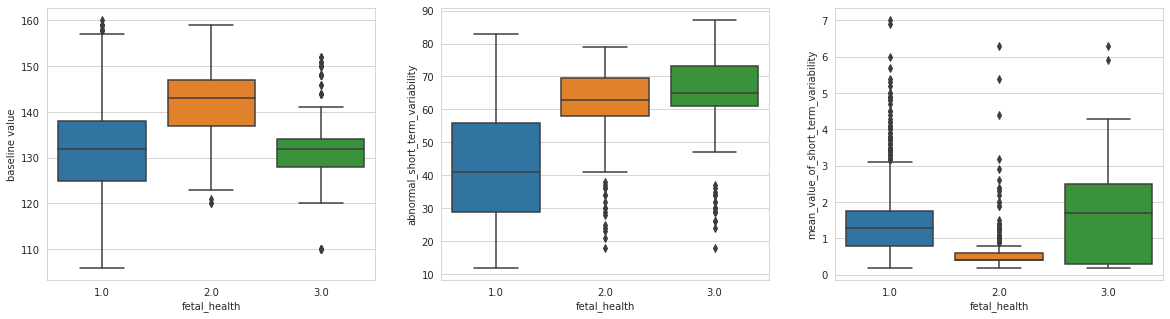

In [13]:
multi_boxplot(df[['baseline value', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'fetal_health']])

<AxesSubplot:xlabel='fetal_health', ylabel='mean_value_of_short_term_variability'>

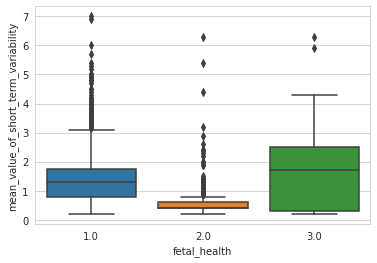

In [14]:
sns.boxplot(x='fetal_health', y='mean_value_of_short_term_variability', data=df)

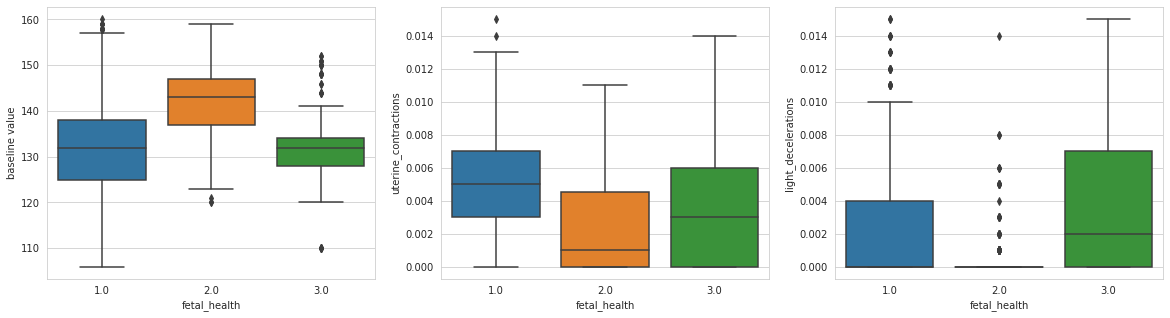

In [15]:
multi_boxplot(df_aux1[['baseline value', 'uterine_contractions', 'light_decelerations', 'fetal_health']])

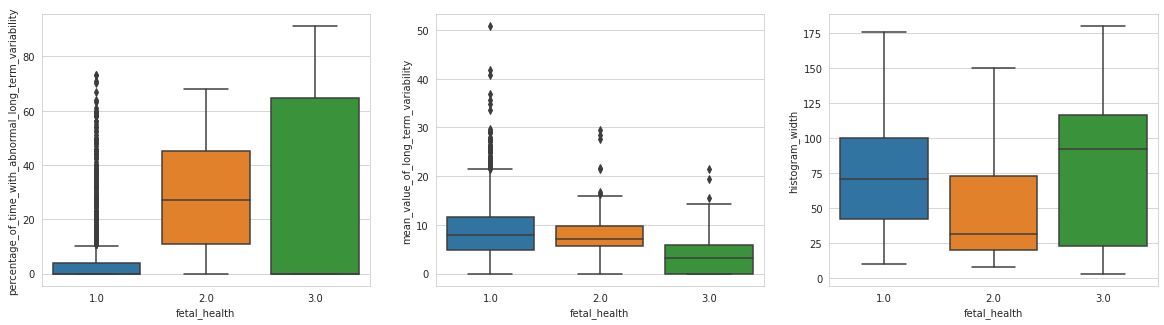

In [16]:
multi_boxplot(df_aux1[['percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width', 'fetal_health']])

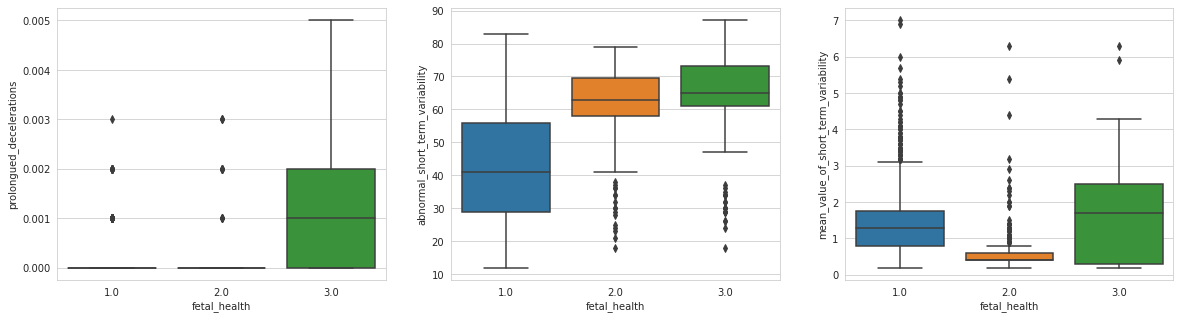

In [17]:
multi_boxplot(df_aux1[['prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability', 'fetal_health']])

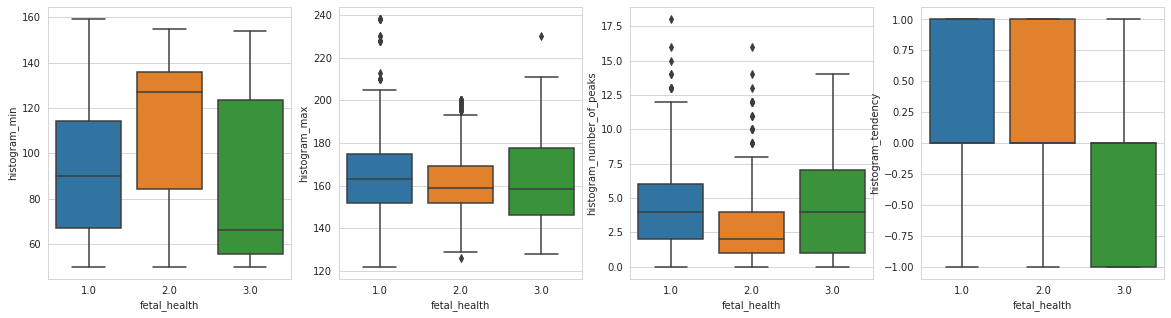

In [18]:
multi_boxplot(df_aux1[['histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_tendency', 'fetal_health']])

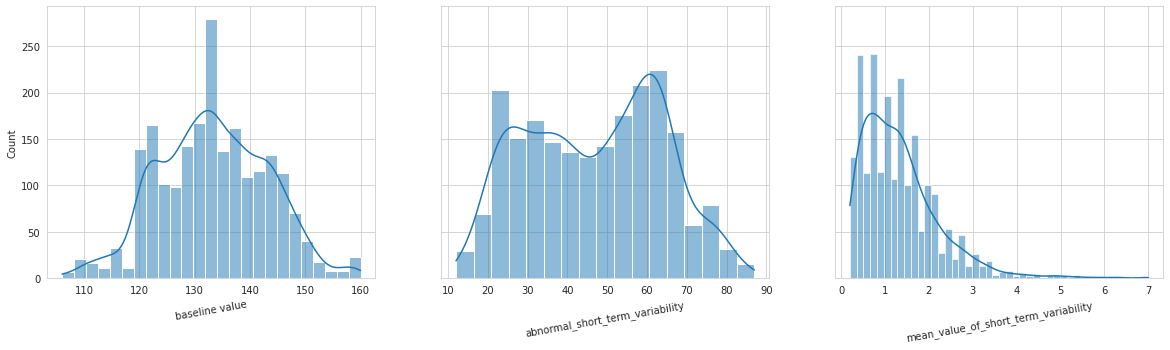

In [19]:
multi_histo(df[['baseline value', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability']])

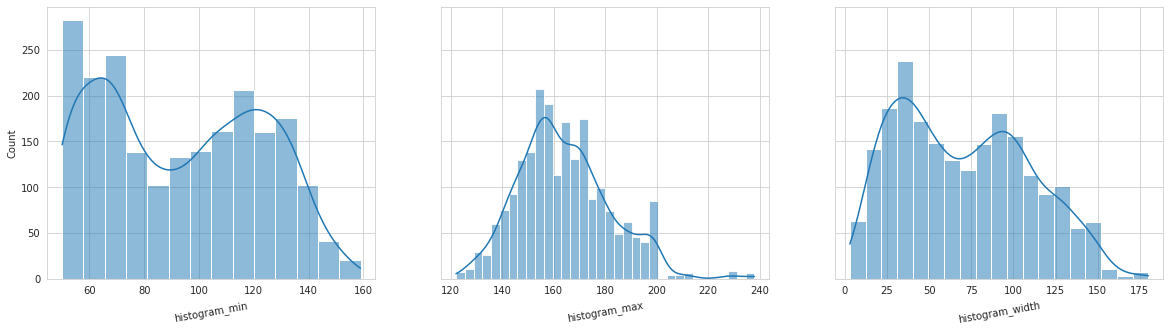

In [20]:
multi_histo(df[['histogram_min', 'histogram_max', 'histogram_width']])

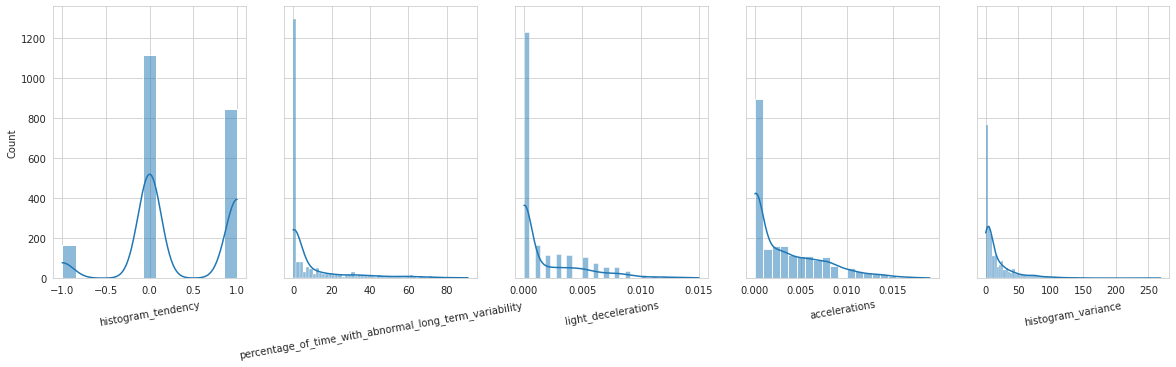

In [21]:
multi_histo(df[['histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'light_decelerations', 'accelerations', 'histogram_variance']])

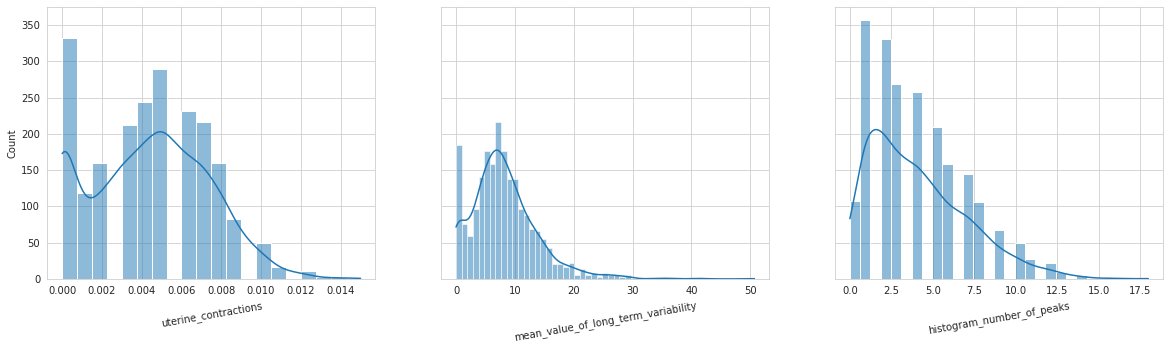

In [22]:
multi_histo(df[['uterine_contractions', 'mean_value_of_long_term_variability', 'histogram_number_of_peaks']])

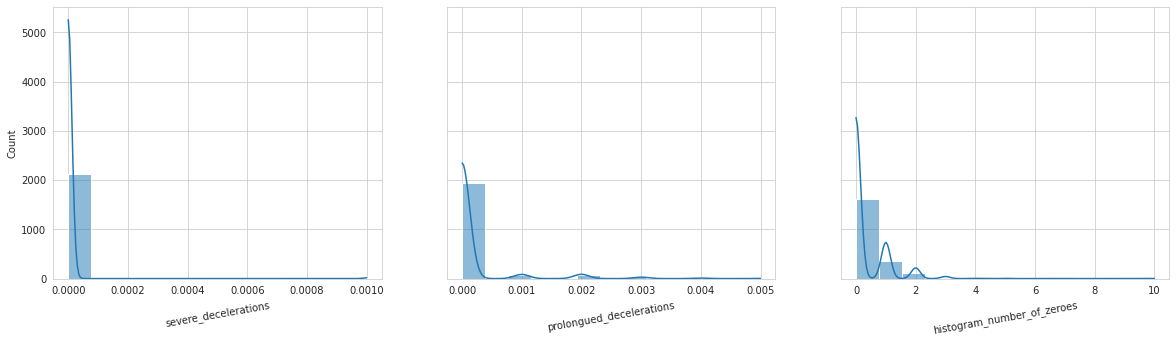

In [23]:
multi_histo(df[['severe_decelerations', 'prolongued_decelerations', 'histogram_number_of_zeroes']])

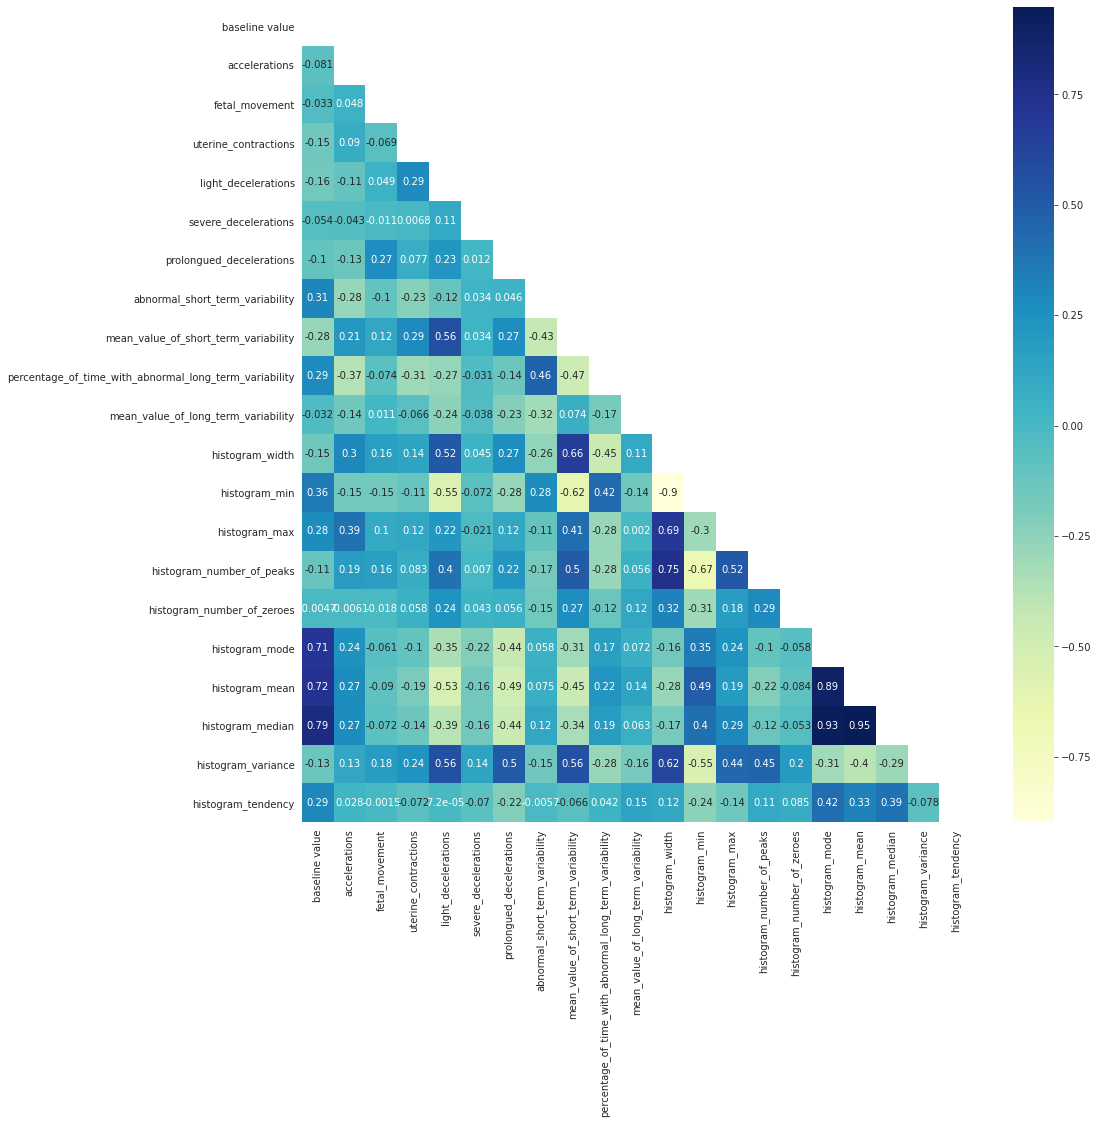

In [24]:
# calculation Pearson correlation

df_aux = df.drop(['fetal_health'], axis=1)

correlation = df_aux.corr()

# creating mask 
mask = np.triu(np.ones_like(correlation)) 

fig = plt.figure(figsize=(15,15))

# plotting a triangle correlation heatmap 
dataplot = sns.heatmap(correlation, cmap="YlGnBu", annot=True, mask=mask) 

#plt.savefig("matriz_cor.eps", bbox_inches="tight")

In [25]:
aux2 = np.abs(correlation) < 0.009

In [26]:
col = aux2[aux2 == True].columns

In [27]:
col

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')